# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix


df = pd.read_csv("C:\\Users\\alcid\\GitHub\\Portfolio\\EBAC\\Dados\\dados_tratados_demo01.csv")
alvo = df.pop("mau_True")

In [4]:
df.head()

,idade,tempo_emprego,qt_pessoas_residencia_2.0,qt_pessoas_residencia_3.0,qt_pessoas_residencia_4.0,qt_pessoas_residencia_5.0,qt_pessoas_residencia_6.0,qt_pessoas_residencia_7.0,qt_pessoas_residencia_9.0,qt_pessoas_residencia_15.0,...,tipo_renda_Working,qtd_filhos_1,qtd_filhos_2,qtd_filhos_3,qtd_filhos_4,qtd_filhos_5,qtd_filhos_7,qtd_filhos_14,possui_fone_1,mau
0,58.832877,3.106849,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,52.356164,8.358904,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,46.224658,2.106849,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,29.230137,3.021918,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,27.482192,4.024658,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [5]:
y = df.pop('mau')
X = df

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6770 entries, 0 to 6769
Data columns (total 40 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   idade                                   6770 non-null   float64
 1   tempo_emprego                           6770 non-null   float64
 2   qt_pessoas_residencia_2.0               6770 non-null   int64  
 3   qt_pessoas_residencia_3.0               6770 non-null   int64  
 4   qt_pessoas_residencia_4.0               6770 non-null   int64  
 5   qt_pessoas_residencia_5.0               6770 non-null   int64  
 6   qt_pessoas_residencia_6.0               6770 non-null   int64  
 7   qt_pessoas_residencia_7.0               6770 non-null   int64  
 8   qt_pessoas_residencia_9.0               6770 non-null   int64  
 9   qt_pessoas_residencia_15.0              6770 non-null   int64  
 10  possui_fone_comercial_1                 6770 non-null   int6

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [20]:
clf = DecisionTreeClassifier(max_depth=5, random_state=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_train)


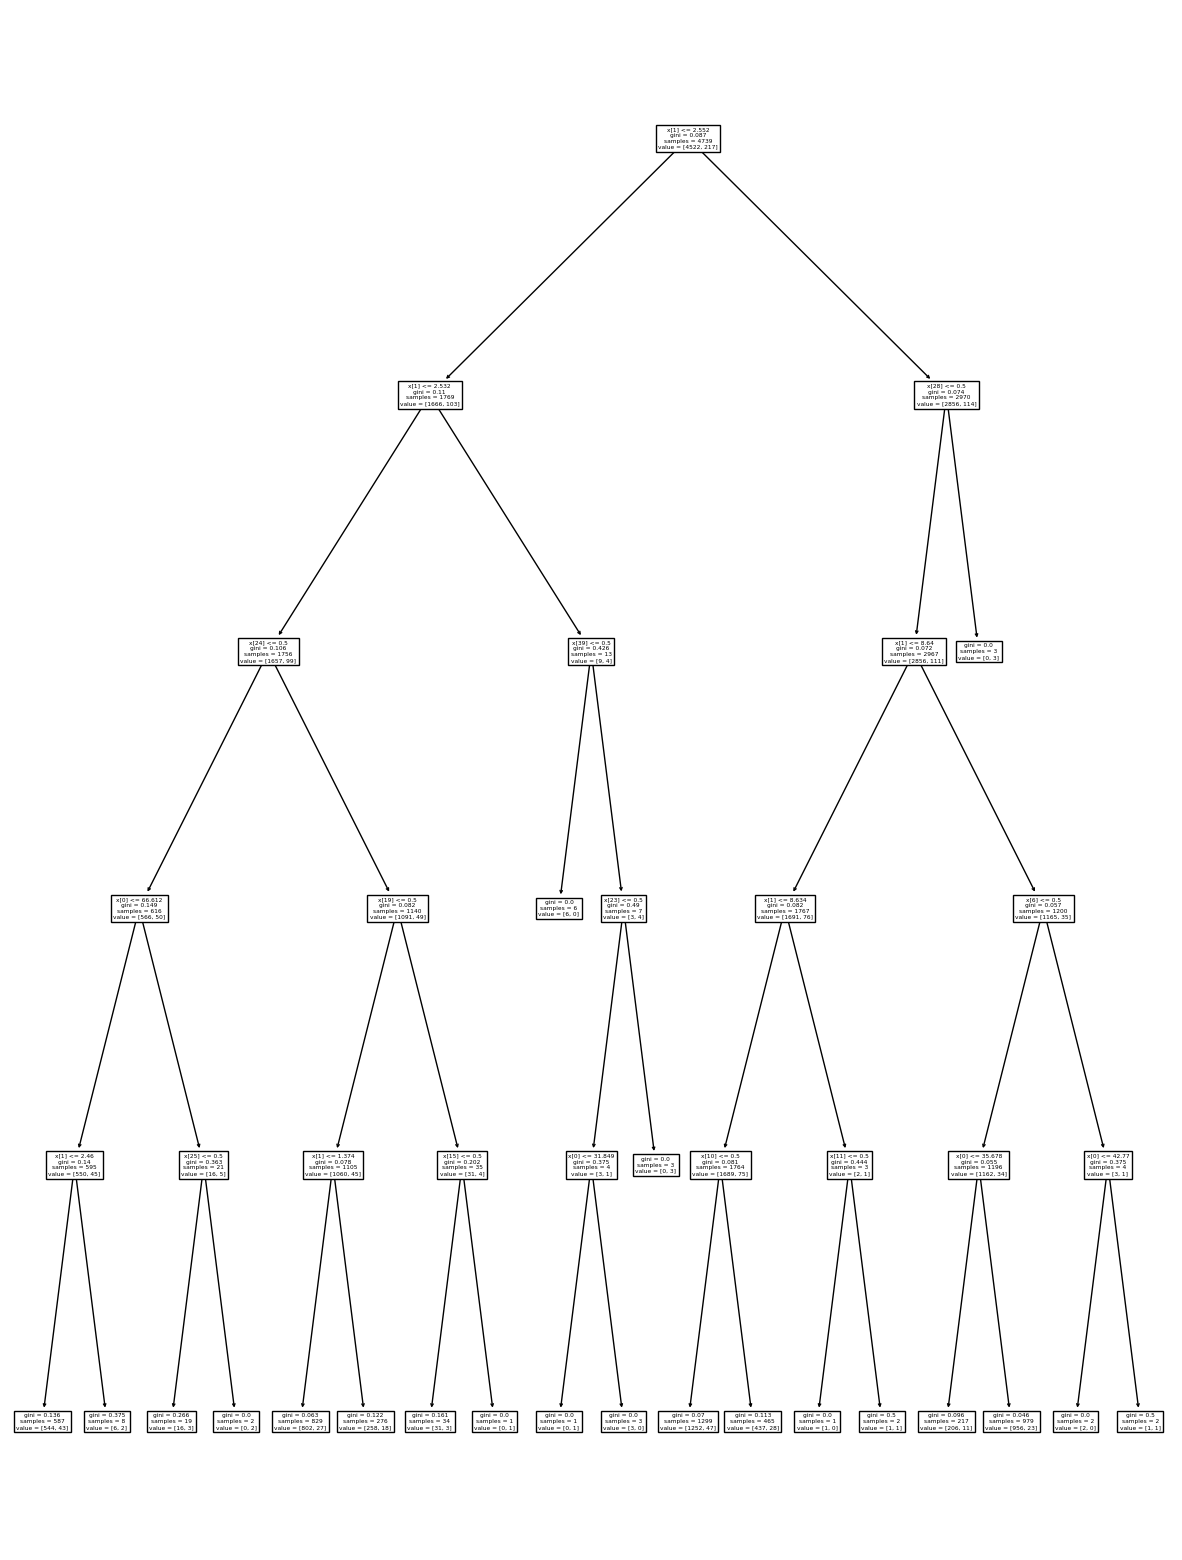

In [21]:
plt.figure(figsize=(15,20))
plot_tree(clf);

In [23]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      4522
           1       1.00      0.05      0.09       217

    accuracy                           0.96      4739
   macro avg       0.98      0.52      0.53      4739
weighted avg       0.96      0.96      0.94      4739



<Axes: >

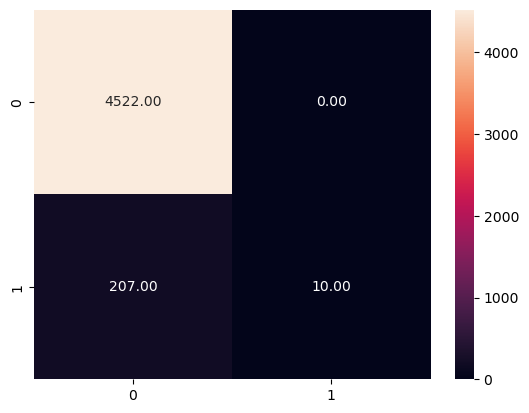

In [25]:
sns.heatmap(confusion_matrix(y_train, y_pred),annot=True, fmt='.2f')

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [26]:
clf = DecisionTreeClassifier(max_depth=5, random_state=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


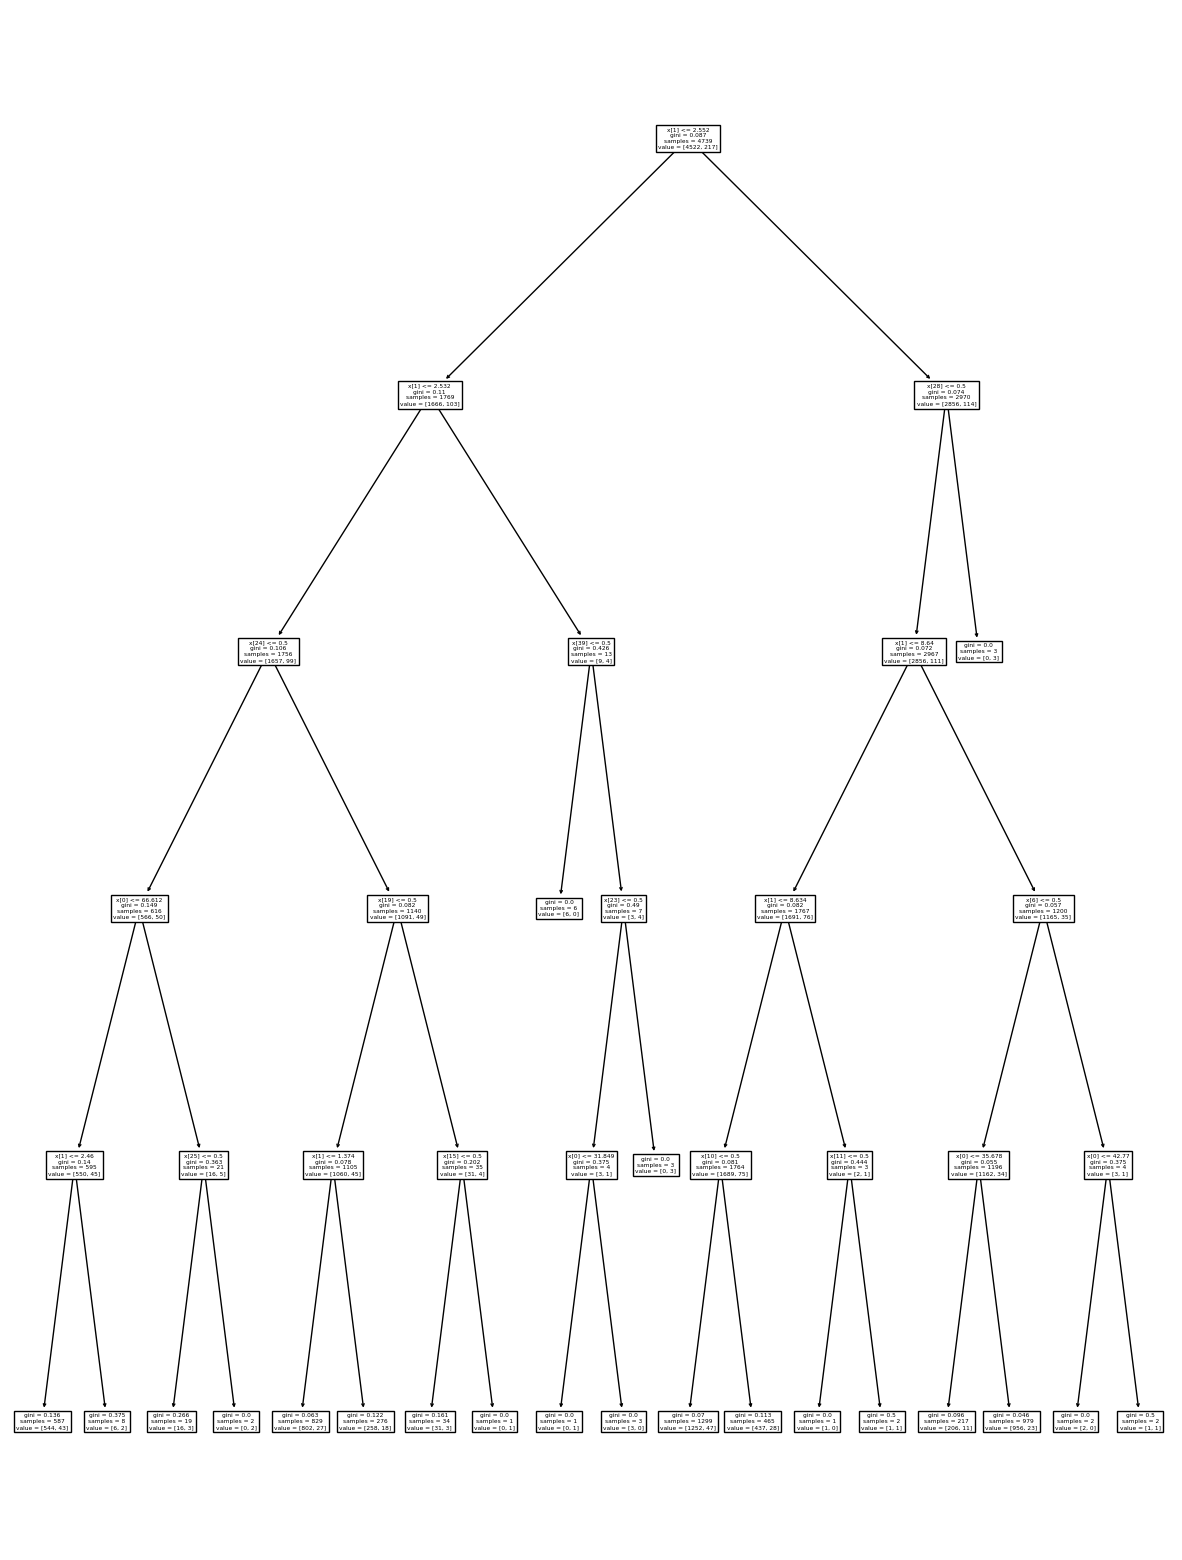

In [27]:
plt.figure(figsize=(15,20))
plot_tree(clf);

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1950
           1       0.50      0.04      0.07        81

    accuracy                           0.96      2031
   macro avg       0.73      0.52      0.52      2031
weighted avg       0.94      0.96      0.94      2031



<Axes: >

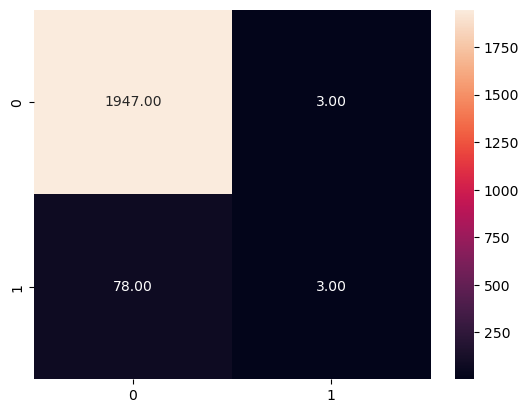

In [30]:
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True, fmt='.2f')